**KING COUNTY HOUSE PREDICTION**

##INTRODUCTION

**Business problem and understanding**

As data scientists at Microsoft,King County,we are tasked with analyzing house sales data in the King County area to build predictive models for sale prices and identify the significant factors influencing these prices.This is due to a noticed significant increase of tech population within the area.
The goal is to support potential investors and homebuyers in making well-informed decisions by offering them data and insights gathered through the comprehensive analysis of the King County real estate market. Moreover, we aim to provide a more confident home-buying experience, assisting them in navigating the market with certainty and success.

**DATA**

The data from the dataset was provided by King County,washington available in the file kc_house_data.csv.The data includes homes sold between 2014 and 2015
From what is provided,this dataset is highly suitable for addressing factors of identifying key home features that increase property values.
In this case,we will identify what and how **internal** and **external** factors have the most substantial impact on the sale price.

**STEP 1**:DATA UNDERSTANDING

In [238]:
import os
from flask import Flask
from flask_wtf import FlaskForm
import sqlalchemy
from flask_sqlalchemy import SQLAlchemy

In [239]:
#Importing the relevant liblaries 
#data manipulation
import pandas as pd
import numpy as np

#data vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#geocoding
import uszipcode

#import plotly.express as px
#from geopy.geocoders import Nominatim
#from uszipcode import SearchEngine


#stat
import statsmodels.api as sm
from scipy.stats import skew

In [240]:
# Handle fuzzywuzzy warning
import warnings
warnings.filterwarnings("ignore", message="Using slow pure-python SequenceMatcher.")

In [241]:
#loading our data using pandas
house_data = pd.read_csv('data/kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Column description

In [242]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below,we get to understand more of how our columns look like as provided in the dataset column_names.md

##KING COUNTY DATASET COLUMN DESCRIPTION

1.*id*: Unique identifier for a house.

2.*date*: Date house was sold.

3.*price*: Sale price (prediction target).

4.*bedrooms*: Number of bedrooms.

5.*bathrooms*: Number of bathrooms.

6.*sqft_living*: Square footage of living space in the home.

7.*sqft_lot*: Square footage of the lot.

8.*floors*: Number of floors (levels) in house.

9.*waterfront*: Whether the house is on a waterfront.

10.*view*: Quality of view from house.

11.*condition*: How good the overall condition of the house is. Related to maintenance of house

12.*grade*: Overall grade of the house. Related to the construction and design of the house.

13.*sqft_above*: Square footage of house apart from basement.

14.*sqft_basement*: Square footage of the basement.

15.*yr_built*: Year when house was built.

16.*yr_renovated*: Year when house was renovated.

17.*zipcode*: ZIP Code used by the United States Postal Service.

18.*lat*: Latitude coordinate.

19.*long*: Longitude coordinate.

20.*sqft_living15*: The square footage of interior housing living space for the nearest 15 neighbors.

21.*sqft_lot15*: The square footage of the land lots of the nearest 15 neighbors.

In [243]:
#checking King county data shape
house_data.shape

(21597, 21)

This Dataframe contains 21,597 rows and 21 columns

In [244]:
# checking the info on house_data DataFrame
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

DATA CLEANING AND PREPARATION

In this section,we are to clean and prepare our data to make it as consistent and useful as possible by using python's libraries frameworks
This includes addind needed columns through what we already have, checking and aligning the datatypes of our column,identifying and dropping duplicate values,identifying and solving of null or missing values by prioritisation

In [245]:
# checking the info on house_data DataFrame
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In regards to the description of the our data frame above,we rectify some the data type of some variables/columns to create consistency in our data

1.**id** : integer to object

2.**bathroom** :float to integer

3.**floors** :float to integer

4.**sqft_basement** :object to float

5.**yr_built** :integer to object

6.**yr_renovated** :float to object

7.**zipcode** :integer to object

8.**lat** integer to object

9.**long**iteger to object

10.**date** : object to datetime


In [246]:

#Convert integers to objects
house_data = house_data.astype({
    #'id': object,
    #'yr_built': object,
    #'yr_renovated': object,

    #objects to float
    'zipcode': float,
    'lat': float,
    'long': float
    })
#house_data.info()

#Convert floats to integers
floats_to_integers = ['bathrooms', 'floors']
house_data[floats_to_integers] = house_data[floats_to_integers].astype(float)
#house_data.info()



Since some of the sqft_basement values are numeric,we will replace them with 0 then convert them to floats

In [247]:
# Replace '?'(gotten from an error indicating availablity of strings in the entries) with 0 and then convert column to float
house_data['sqft_basement'] = house_data['sqft_basement'].replace('?', '0')
house_data['sqft_basement'] = house_data['sqft_basement'].astype(float)


In [248]:
#Convert the date column to datetime format
house_data['date'] = pd.to_datetime(house_data['date'])
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [249]:
#Sort the dataframe by the date column
house_data =house_data.sort_values(by='date')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,NO,NONE,...,7 Average,1450,0.0,1954,0.0,98006.0,47.5746,-122.135,1260,8942
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,NO,NONE,...,8 Good,3310,0.0,2012,0.0,98065.0,47.5150,-121.870,2380,5000
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,NaN,NONE,...,7 Average,1140,800.0,1976,0.0,98052.0,47.6830,-122.114,2200,10500
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,NO,NONE,...,7 Average,1280,350.0,2009,0.0,98106.0,47.5489,-122.363,1590,2306
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,NO,NONE,...,9 Better,1700,900.0,1951,0.0,98117.0,47.6833,-122.400,2380,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,NaN,FAIR,...,8 Good,1380,600.0,1960,0.0,98116.0,47.5607,-122.391,1810,5850
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,NO,NONE,...,7 Average,1410,0.0,1985,0.0,98023.0,47.3273,-122.370,2950,29152
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,NO,NONE,...,7 Average,1870,0.0,1960,0.0,98007.0,47.5951,-122.144,1870,7650
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,NO,NONE,...,6 Low Average,720,670.0,1941,0.0,98115.0,47.6914,-122.308,920,6380


In [250]:

from datetime import date
#Create a new column with only the year values
house_data['year'] = house_data['date'].apply(lambda x: x.year)
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
7316,2202500290,2014-05-02,435000.0,4,1.0,1450,8800,1.0,NO,NONE,...,1450,0.0,1954,0.0,98006.0,47.5746,-122.135,1260,8942,2014
20586,7853361370,2014-05-02,555000.0,4,2.5,3310,6500,2.0,NO,NONE,...,3310,0.0,2012,0.0,98065.0,47.5150,-121.870,2380,5000,2014
1040,7197300105,2014-05-02,550000.0,4,2.5,1940,10500,1.0,NaN,NONE,...,1140,800.0,1976,0.0,98052.0,47.6830,-122.114,2200,10500,2014
20543,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,NO,NONE,...,1280,350.0,2009,0.0,98106.0,47.5489,-122.363,1590,2306,2014
9587,472000620,2014-05-02,790000.0,3,2.5,2600,4750,1.0,NO,NONE,...,1700,900.0,1951,0.0,98117.0,47.6833,-122.400,2380,4750,2014


In [251]:

house_data['year']


7316     2014
20586    2014
1040     2014
20543    2014
9587     2014
         ... 
19381    2015
12623    2015
5632     2015
13040    2015
16580    2015
Name: year, Length: 21597, dtype: int64

In [252]:
#Define a function to calculate the age based on the build year
def get_age(yr_built):
    #Get the current year
    current_year = date.today().year

    #Calculate the age by subtracting the build year from the current year
    age = current_year - yr_built
    return age

#Apply the function to create a new column called "age"
house_data['house_age'] = house_data['yr_built'].apply(get_age)

# Print the first few rows to make sure the new column was added correctly
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age
7316,2202500290,2014-05-02,435000.0,4,1.0,1450,8800,1.0,NO,NONE,...,0.0,1954,0.0,98006.0,47.5746,-122.135,1260,8942,2014,70
20586,7853361370,2014-05-02,555000.0,4,2.5,3310,6500,2.0,NO,NONE,...,0.0,2012,0.0,98065.0,47.5150,-121.870,2380,5000,2014,12
1040,7197300105,2014-05-02,550000.0,4,2.5,1940,10500,1.0,NaN,NONE,...,800.0,1976,0.0,98052.0,47.6830,-122.114,2200,10500,2014,48
20543,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,NO,NONE,...,350.0,2009,0.0,98106.0,47.5489,-122.363,1590,2306,2014,15
9587,472000620,2014-05-02,790000.0,3,2.5,2600,4750,1.0,NO,NONE,...,900.0,1951,0.0,98117.0,47.6833,-122.400,2380,4750,2014,73


In [253]:
house_data['house_age']

7316      70
20586     12
1040      48
20543     15
9587      73
        ... 
19381     64
12623     39
5632      64
13040     83
16580    100
Name: house_age, Length: 21597, dtype: int64

In [254]:
# Define a function to calculate the age based on the yr_renovated
def get_age(yr_renovated):
    # Get the current year
    current_year = date.today().year

    renov_age = current_year - yr_renovated
    return renov_age
# Renovation age
house_data['renov_age'] = np.where(house_data['yr_renovated'] == 0, 0, 2024 - house_data['yr_renovated'])
house_data
# Apply the function to create a new column called "renov_age"
house_data['renov_age'] = house_data['yr_built'].apply(get_age)


#Print the first few rows to make sure the new column was added correctly
house_data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age,renov_age
7316,2202500290,2014-05-02,435000.0,4,1.0,1450,8800,1.0,NO,NONE,...,1954,0.0,98006.0,47.5746,-122.135,1260,8942,2014,70,70
20586,7853361370,2014-05-02,555000.0,4,2.5,3310,6500,2.0,NO,NONE,...,2012,0.0,98065.0,47.5150,-121.870,2380,5000,2014,12,12
1040,7197300105,2014-05-02,550000.0,4,2.5,1940,10500,1.0,NaN,NONE,...,1976,0.0,98052.0,47.6830,-122.114,2200,10500,2014,48,48
20543,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,NO,NONE,...,2009,0.0,98106.0,47.5489,-122.363,1590,2306,2014,15,15
9587,472000620,2014-05-02,790000.0,3,2.5,2600,4750,1.0,NO,NONE,...,1951,0.0,98117.0,47.6833,-122.400,2380,4750,2014,73,73


In [255]:
#Create a search engine object
search = SearchEngine()


#Define a function to get city names from zip codes
def get_city_from_zip(zipcode):
    try:
        city = search.by_zipcode(zipcode).major_city
    except:
        city = None
    return city

#Apply the function to the Zipcode column of the dataframe
house_data["city"] = house_data["zipcode"].apply(get_city_from_zip)

# Print the resulting dataframe
house_data.head()

NameError: name 'SearchEngine' is not defined

Check for any missing values bellow

In [ ]:
#Checking for missing values
house_data.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2376
view                63
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
year                 0
house_age            0
renov_age            0
city             21597
dtype: int64

Observation;

Some columns have missing values ;

**Waterfront** -2,376 rows (11.002%)

**view** - 63 rows (0.3%)

**yr_renovated** -3,842(17.8%)

Get the entries of the three columns with missing data,types and their counts to observe and conclude on how to manipulate them

In [ ]:
waterfront_data = house_data['waterfront'].value_counts()
waterfront_data

NO     19075
YES      146
Name: waterfront, dtype: int64

In [ ]:
view_data= house_data['view'].value_counts()
view_data

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [ ]:
yr_renovated_data = house_data['yr_renovated'].value_counts()
yr_renovated_data

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1976.0        1
1944.0        1
1948.0        1
1950.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

How we get to deal with missing values

**Waterfront** -Replace the 2,376 NaN values with 'UNKNOWN'

**View** -Replace the 63 NaN missing values with 'NOT_RATED'

**yr_renovated**- Replace the 3,842 missing values with 0,this could be used to manifest or indicate that there where no renovations done

In [ ]:
house_data['waterfront'] = house_data['waterfront'].fillna('UNKNOWN')
house_data['view'] = house_data['view'].fillna('NOT_RATED')
house_data['yr_renovated'] = house_data['yr_renovated'].fillna(0)


In [ ]:
#Confirm missing values
house_data.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
year                 0
house_age            0
renov_age            0
city             21597
dtype: int64

In [ ]:
cadinality = house_data.select_dtypes(include='object').nunique()
cadinality

waterfront     3
view           6
condition      5
grade         11
city           0
dtype: int64

Let us check for any duplicates in our data

In [ ]:
house_data.duplicated().sum()

0

In [ ]:
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age,renov_age,city
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,NO,NONE,...,0.0,98006.0,47.5746,-122.135,1260,8942,2014,70,70,None
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,NO,NONE,...,0.0,98065.0,47.5150,-121.870,2380,5000,2014,12,12,None
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,UNKNOWN,NONE,...,0.0,98052.0,47.6830,-122.114,2200,10500,2014,48,48,None
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,NO,NONE,...,0.0,98106.0,47.5489,-122.363,1590,2306,2014,15,15,None
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,NO,NONE,...,0.0,98117.0,47.6833,-122.400,2380,4750,2014,73,73,None
9578,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,NO,NONE,...,0.0,98029.0,47.5794,-122.025,2820,48351,2014,45,45,None
11879,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,NO,NONE,...,0.0,98155.0,47.7538,-122.325,1300,8408,2014,10,10,None
11895,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,NO,NONE,...,0.0,98092.0,47.2617,-122.190,2830,80148,2014,45,45,None
4959,7525000080,2014-05-02,588500.0,3,1.75,2330,14892,1.0,NO,NONE,...,0.0,98074.0,47.6267,-122.046,2570,14217,2014,44,44,None
3719,7739100015,2014-05-02,463000.0,3,1.75,1710,7320,1.0,NO,NONE,...,0.0,98155.0,47.7512,-122.281,2260,8839,2014,76,76,None


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7316 to 16580
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2

In [ ]:
# Initialize a geocoder (Nominatim in this case)
geolocator = Nominatim(user_agent="my-application")

# Function to perform reverse geocoding
def reverse_geocode(lat, lng):
    location = geolocator.reverse((lat, lng), exactly_one=True)
    if location:
        return location.address
    else:
        return None
    
    # Apply reverse geocoding to each row in the dataframe
house_data['address'] = house_data.apply(lambda row: reverse_geocode(row['latitude'], row['longitude']), axis=1)

# Remove rows where address is None (optional)
house_data = house_data.dropna(subset=['address'])


ConfigurationError: Using Nominatim with default or sample `user_agent` "my-application" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.

In [ ]:
# Separate data by year
k_2014 = k_df[k_df["year"] == 2014]
k_2015 = k_df[k_df["year"] == 2015]

EXPLORATORY DATA ANALYSIS

In [ ]:
#Displaying unique values for selected columns
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']
variable_df = house_data[variables]

for column in variable_df.columns:
    unique_values = variable_df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'bedrooms': [ 4  2  3  5  7  6  9  1  8 33 10 11]
Unique values for 'bathrooms': [1.   2.5  1.75 2.   3.25 2.25 1.5  2.75 3.   4.25 3.5  8.   5.   3.75
 4.   5.75 4.5  1.25 6.5  0.75 4.75 5.25 5.5  6.25 6.75 7.5  0.5  6.
 7.75]
Unique values for 'sqft_living': [1450 3310 1940 ... 4073  390 3402]
Unique values for 'sqft_lot': [ 8800  6500 10500 ... 17709  7289  6670]
Unique values for 'floors': [1.  2.  1.5 3.  2.5 3.5]
Unique values for 'sqft_above': [1450 3310 1140 1280 1700 2820 2300 1970 1710 1520 1800  880 1040 1580
 1440 1160 1090 1570 1600 1210 1470 3240 1770 1650 1080 2910 1200  850
 3370 1370 1560 1930 1270 2680 1880 2710 1180 3110 1550 1340 1480 1910
 1000 1640 3660 2540 1360 1130  800 1350 1300 2730 2200 2190 1070 1460
 1010  900 2920 2010 1990 3410 3180 2230 3400 1400 2220  810 1540 1571
 1408 2370 1610 2850 1750 1050 1110 1900 1590 1680 9410 1240 1120 2450
 2490 2310 1410 3200  840 3040 1430 2780 1660 2440 1330 2110 1790 3690
 1620 1810 1670 1940 1960 1690

In [ ]:
#Summary Statistics: Compute basic statistics to understand the distribution and variability of each numerical feature.
print("\nSummary statistics:")
print(house_data.describe())


Summary statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  2.159700e+04  21597.000000  21597.000000   21597.000000  21597.000000   
mean   1.509941e+04      1.494096   1788.596842     285.716581   1970.999676   
std    4.141264e+04      0.

Correlation Matrix

In [ ]:
corr_matrix = house_data.corr()
corr_matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.009915,-0.021617
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.003727,-0.053953
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.009949,-0.155670
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.026577,-0.507173
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.029014,-0.318152
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005628,-0.052946
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022352,-0.489193
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.023782,-0.424037
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885,-0.014997,0.130085
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.003574,-1.000000


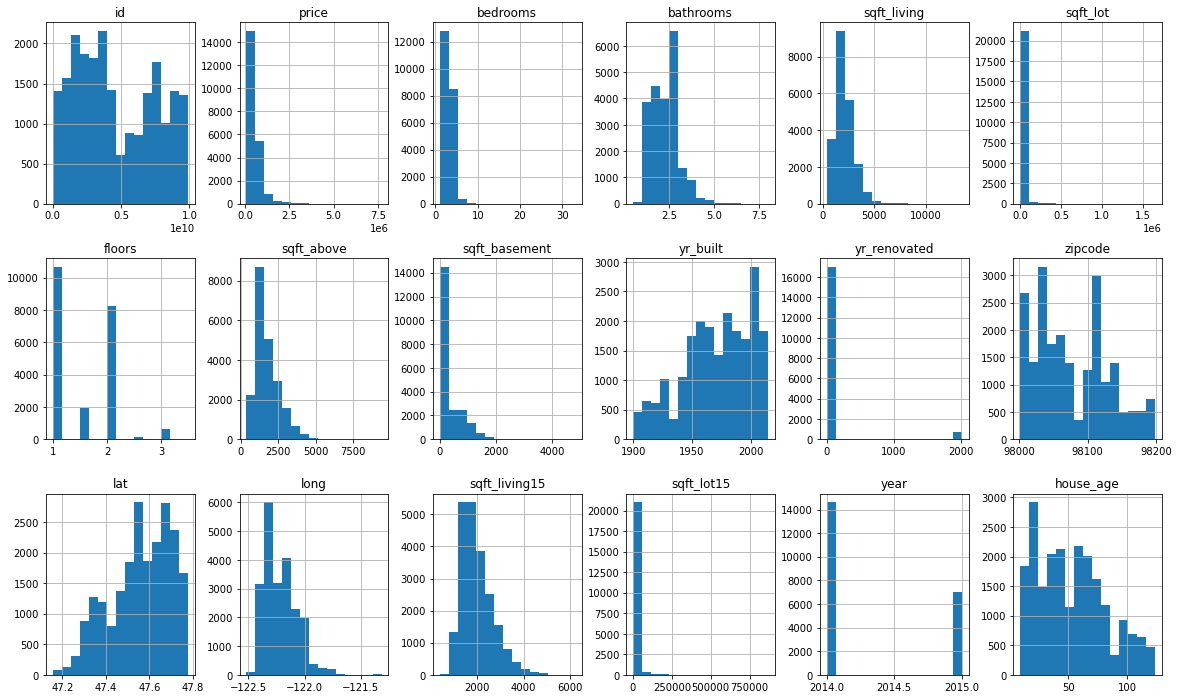

In [ ]:

#Displaying histograms for each variable
house_data.hist(bins=15, figsize=(20,12), layout=(3, 6))
plt.show()


In [ ]:
# Access correlations between 'price' and other variables from the correlation matrix
price_correlations = corr_matrix['price']  # Drop 'price' itself to avoid correlation with itself

print("Correlations with Price:")
print(price_correlations)


Correlations with Price:
id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
year             0.003727
house_age       -0.053953
Name: price, dtype: float64


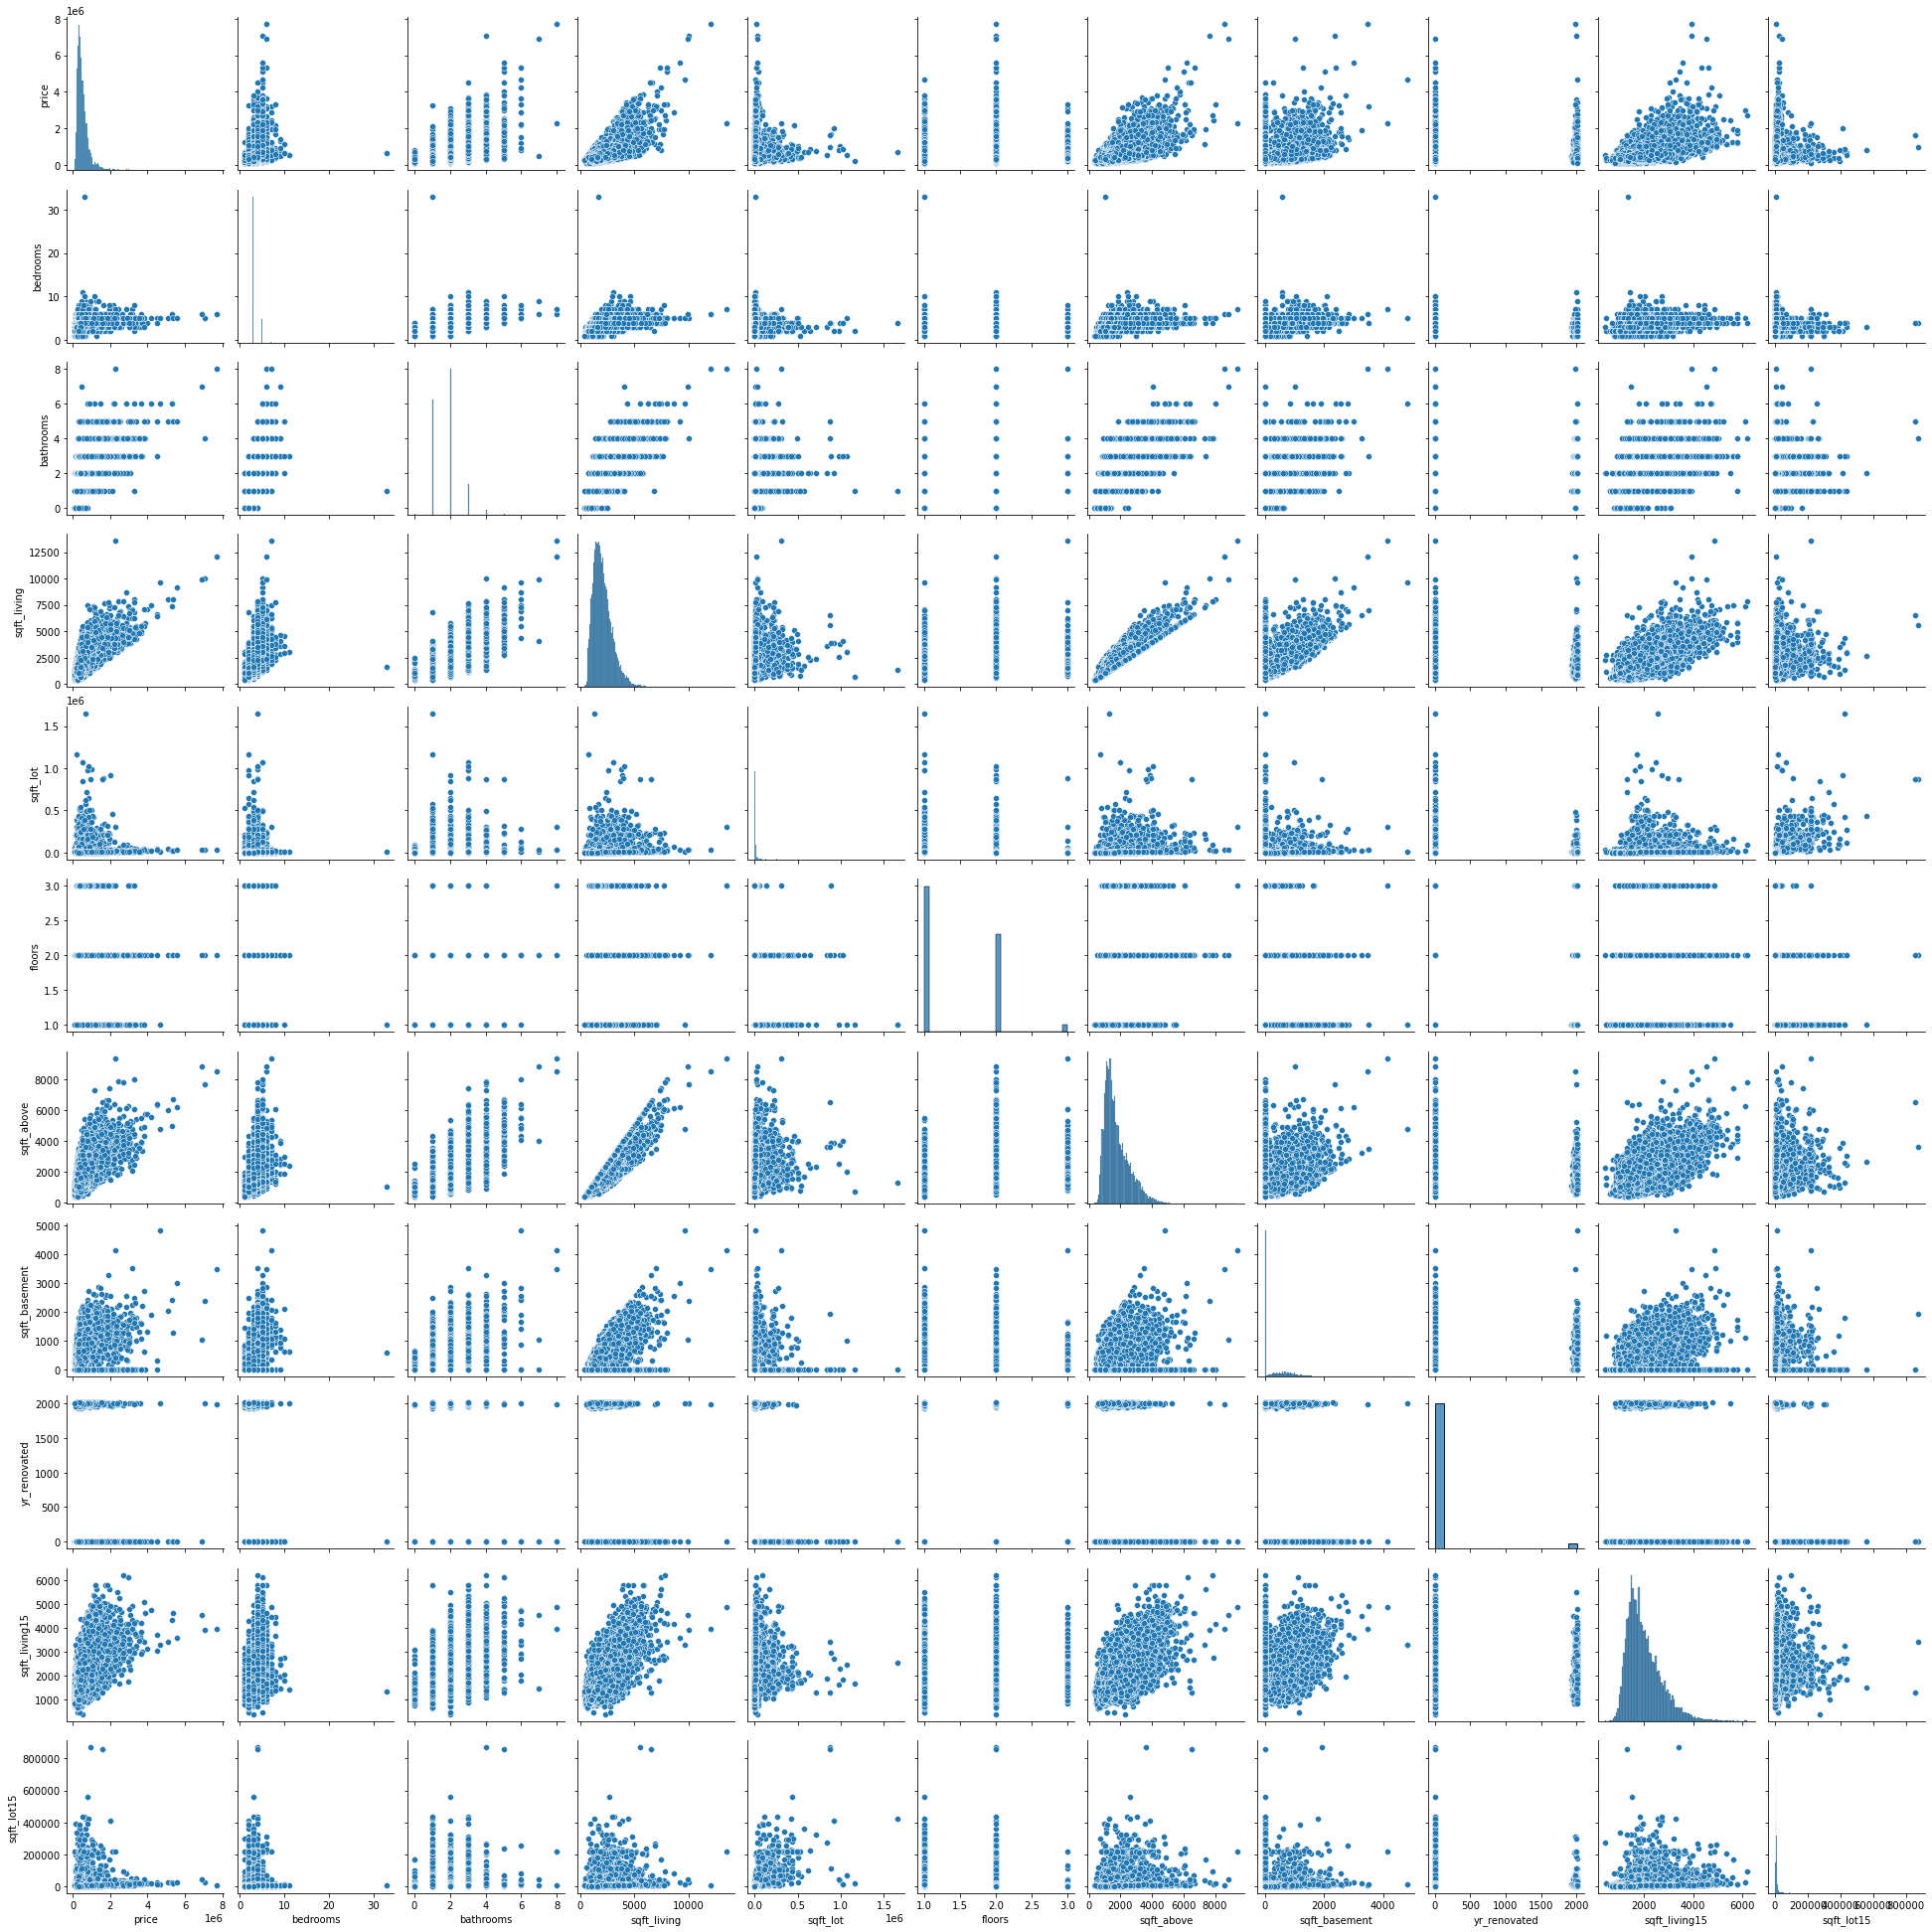

In [ ]:
# Extract the columns based on their correlation with price
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors', 'sqft_above', 'sqft_basement', 'yr_renovated',
                   'sqft_living15', 'sqft_lot15']

# Create the pair plot
sns.pairplot(house_data[columns_to_plot])
plt.show()


PAIR PLOT

In [ ]:
house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
# Renovation age

house_data['renovation_age'] = current_year - house_data['yr_renovated'])
data
# Renovation age
house_data['renovation_age'] = np.where(house_data['yr_renovated'] == 0, 0, 2024 - data['yr_renovated'])
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age,city,renov_age
7316,2202500290,2014-05-02,435000.0,4,1.0,1450,8800,1.0,NO,NONE,...,0.0,98006.0,47.5746,-122.135,1260,8942,2014,70,None,70
20586,7853361370,2014-05-02,555000.0,4,2.5,3310,6500,2.0,NO,NONE,...,0.0,98065.0,47.5150,-121.870,2380,5000,2014,12,None,12
1040,7197300105,2014-05-02,550000.0,4,2.5,1940,10500,1.0,UNKNOWN,NONE,...,0.0,98052.0,47.6830,-122.114,2200,10500,2014,48,None,48
20543,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,NO,NONE,...,0.0,98106.0,47.5489,-122.363,1590,2306,2014,15,None,15
9587,472000620,2014-05-02,790000.0,3,2.5,2600,4750,1.0,NO,NONE,...,0.0,98117.0,47.6833,-122.400,2380,4750,2014,73,None,73


In [ ]:
# Grouping by 'bedrooms' and calculating mean price and sqft_living for each group
grouped_data = house_data.groupby(['bedrooms']).agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'id': 'count'  # Example of counting number of records in each group
}).reset_index()
grouped_data
grouped_data.sort_values(by='price')

,bedrooms,price,sqft_living,id
0,1,3.182395e+05,888.153061,196
1,2,4.013877e+05,1239.752899,2760
2,3,4.662766e+05,1805.837235,9824
10,11,5.200000e+05,3000.000000,1
3,4,6.355647e+05,2554.649666,6882
11,33,6.400000e+05,1620.000000,1
4,5,7.868741e+05,3047.545284,1601
9,10,8.200000e+05,3706.666667,3
5,6,8.258535e+05,3284.341912,272
8,9,8.939998e+05,3775.000000,6


In [ ]:
grouped_data.corr()

,yr_renovated,price,sqft_living,id
yr_renovated,1.000000,0.107890,0.055139,-0.995657
price,0.107890,1.000000,0.752311,-0.053176
sqft_living,0.055139,0.752311,1.000000,0.000056
id,-0.995657,-0.053176,0.000056,1.000000
